# Predicting the p-degree of aggregation for a new site

*Goal: We want to predict the H indicator values according to the aggregation rate (p) for a new geographical site.*  
The prediction is carried out considering only one chronicle and one approximation. The dataset contains the following data for each simulation configuration:
- the site number
- the H indicator values
- the execution time
- the number of lines in the input file
- the vulnerability rate
- etc

In [13]:
# Lib imports
import os
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

# Global variables
result_folder = "/run/media/jnsll/b0417344-c572-4bf5-ac10-c2021d205749/exps_modflops/results/"
dataset_filename = "Exps_H_Indicator_All_Sites.csv"

# Prediction variables
chronicle = 0
approx = 0
#test_site = 1 # belongs to [1,...]
learn_size = 0.3
test_site = 0

# Path to store the files created during the prediction process
MYDIR = result_folder + "ZLearning/" + "Approx"+ str(approx) + "/Chronicle" + str(chronicle) + "/SiteTest" + str(test_site)

# Checking if the path and directory where to store the prediction files exists, if not it is created
CHECK_FOLDER = os.path.isdir(MYDIR)
if not CHECK_FOLDER:
    os.makedirs(MYDIR)
    print("The directory did not exist. It has been created here: " + MYDIR)



## The dataset for the prediction

In [14]:
#Lib imports
import pandas as pd

# Importing the dataset and storing it inside a dataframe
df = pd.read_csv(result_folder + dataset_filename)

# Only selecting the data corresponding to the chronicle and approximation chosen
df_chr = df[df["Chronicle"]==chronicle]
df_Chr_Approx = df_chr[df_chr["Approx"]==approx]

# Removing the dataframe columns which are not to be used for the prediction
del df_Chr_Approx["Approx"]
del df_Chr_Approx["Chronicle"]
del df_Chr_Approx["Execution Time"]
del df_Chr_Approx["Number of Lines"]

#print("test site: ", test_site)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_Chr_Approx)

Site_number   H Error    Rate  Satured Zone Area  Vulnerability Sum  \
0              1  0.000000     1.0              10090       10033.288413   
1              1  0.000443     2.0              10090       10033.288413   
2              1  0.002206     7.0              10090       10033.288413   
3              1  0.006237    30.0              10090       10033.288413   
4              1  0.017477    90.0              10090       10033.288413   
5              1  0.034507   182.0              10090       10033.288413   
6              1  0.042512   365.0              10090       10033.288413   
7              1  0.053172   730.0              10090       10033.288413   
8              1  0.065296  3652.0              10090       10033.288413   
15             2  0.000000     1.0               4825        4671.980544   
21             3  0.000000     1.0               7973        7770.851204   
25             4  0.000000     1.0               1138        1117.499958   
26             4  0.000582     2.0               1138        1117.499958   
27             4  0.002886     7.0               1138        1117.499958   
28             4  0.008823    30.0               1138        1117.499958   
29             4  0.025540    90.0               1138        1117.499958   
30             4  0.044538   182.0               1138        1117.499958   
31             4  0.054934   365.0               1138        1117.499958   
32             4  0.063704   730.0               1138        1117.499958   
33             4  0.076948  3652.0               1138        1117.499958   
51             5  0.000000     1.0               1817        1613.314233   
52             5  0.006768     7.0               1817        1613.314233   
53             5  0.018762    30.0               1817        1613.314233   
54             5  0.046523    90.0               1817        1613.314233   
55             5  0.088123   182.0               1817        1613.314233   
56             5  0.104280   365.0               1817        1613.314233   
57             5  0.123082   730.0               1817        1613.314233   
58             5  0.149126  3652.0               1817        1613.314233   
88             6  0.000000     1.0                670         521.939399   
89             6  0.003064     2.0                670         521.939399   
90             6  0.014216     7.0                670         521.939399   
91             6  0.042559    30.0                670         521.939399   
92             6  0.106831    90.0                670         521.939399   
93             6  0.192654   182.0                670         521.939399   
94             6  0.231377   365.0                670         521.939399   
95             6  0.267397   730.0                670         521.939399   
96             6  0.297834  3652.0                670         521.939399   
128            7  0.000000     1.0               2064        2024.962116   
129            7  0.000790     2.0               2064        2024.962116   
130            7  0.004061     7.0               2064        2024.962116   
131            7  0.011274    30.0               2064        2024.962116   
132            7  0.029907    90.0               2064        2024.962116   
133            7  0.066772   182.0               2064        2024.962116   
134            7  0.080720   365.0               2064        2024.962116   
135            7  0.098253   730.0               2064        2024.962116   
136            7  0.107657  3652.0               2064        2024.962116   
168            8  0.000000     1.0               4342        4276.612263   
169            8  0.000601     2.0               4342        4276.612263   
170            8  0.002741     7.0               4342        4276.612263   
171            8  0.007622    30.0               4342        4276.612263   
172            8  0.020775    90.0               4342        4276.612263   
173            8  0.039135   182.0               4342

## Scatter plot of the variable to predict (H indicator value)

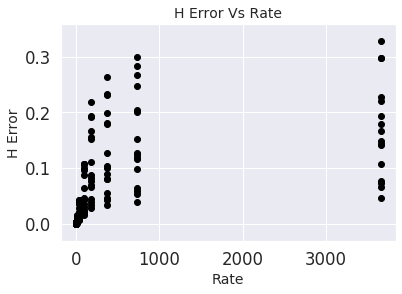

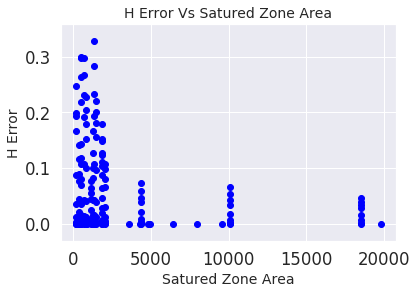

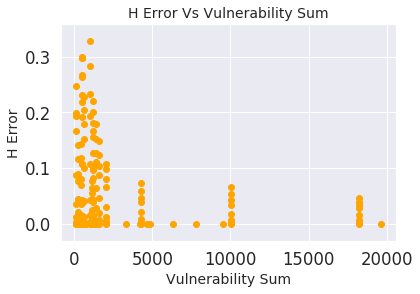

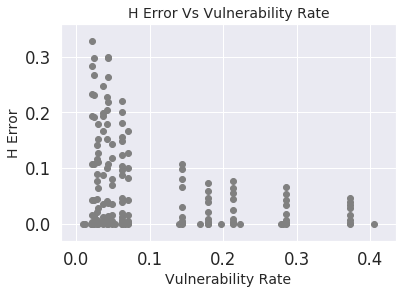

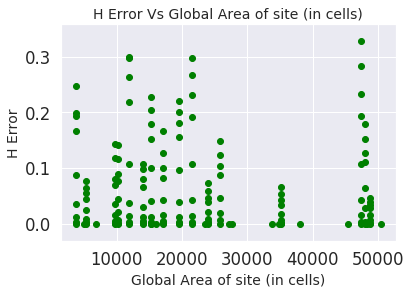

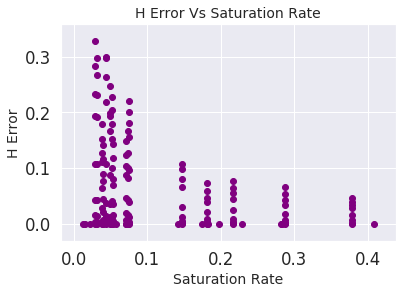

<Figure size 432x288 with 0 Axes>

In [15]:
#Lib imports
import matplotlib.pyplot as plt

# Variables for the scatter plot
## Names of the features corresponding to the names of the columns of the dataframe
features = ["Rate", "Satured Zone Area", "Vulnerability Sum", "Vulnerability Rate", "Global Area of site (in cells)", "Saturation Rate"]
## colors wanted to be used for the each plot for the corresponding feature
colors = ["black", "blue", "orange", "grey", "green", "purple"]

# Iterating over the feature
for nb_feature in range(len(features)):
    plt.scatter(df_Chr_Approx[features[nb_feature]], df_Chr_Approx['H Error'], color=colors[nb_feature])
    plt.title('H Error Vs ' + features[nb_feature], fontsize=14)
    plt.xlabel(features[nb_feature], fontsize=14)
    plt.ylabel('H Error', fontsize=14)
    plt.grid(True)
    

    #plt.savefig(MYDIR + '/simple_scatter_plot_HError_' + features[nb_feature] + '.png') #, bbox_inches='tight'
    plt.show()
    plt.clf()

## Statistics from the learning dataset

In [16]:
#Lib imports
import numpy as np

# Variable to predict
y = df_Chr_Approx.filter(["Site_number", "H Error"], axis=1)
#y = pd.concat([df_Chr_Approx["Site_number"], df_Chr_Approx["H Error"]], axis=1)
# Features used to predict
X = df_Chr_Approx.drop('H Error', axis=1)
#new = old.filter(['A','B','D'], axis=1)
print("Learning Dataset has {} data points with {} variables each.".format(*df_Chr_Approx.shape))


# Minimum value of the data
minimum_H = np.amin(y["H Error"])
# Maximum value of the data
maximum_H = np.amax(y["H Error"])

# Mean value of the data
mean_H = np.mean(y["H Error"])

# Median value of the data
median_H = np.median(y["H Error"])

# Standard deviation of values of the data
std_H = np.std(y["H Error"])

# Show the calculated statistics
print("Statistics for dataset:\n")
print("Minimum H: {}".format(minimum_H)) 
print("Maximum H: {}".format(maximum_H))
print("Mean H: {}".format(mean_H))
print("Median H {}".format(median_H))
print("Standard deviation of H: {}".format(std_H))

Learning Dataset has 154 data points with 8 variables each.
Statistics for dataset:

Minimum H: 0.0
Maximum H: 0.327672624834692
Mean H: 0.06760010657513557
Median H 0.035547504479569
Standard deviation of H: 0.08225310202240842


## Pairplots of the features

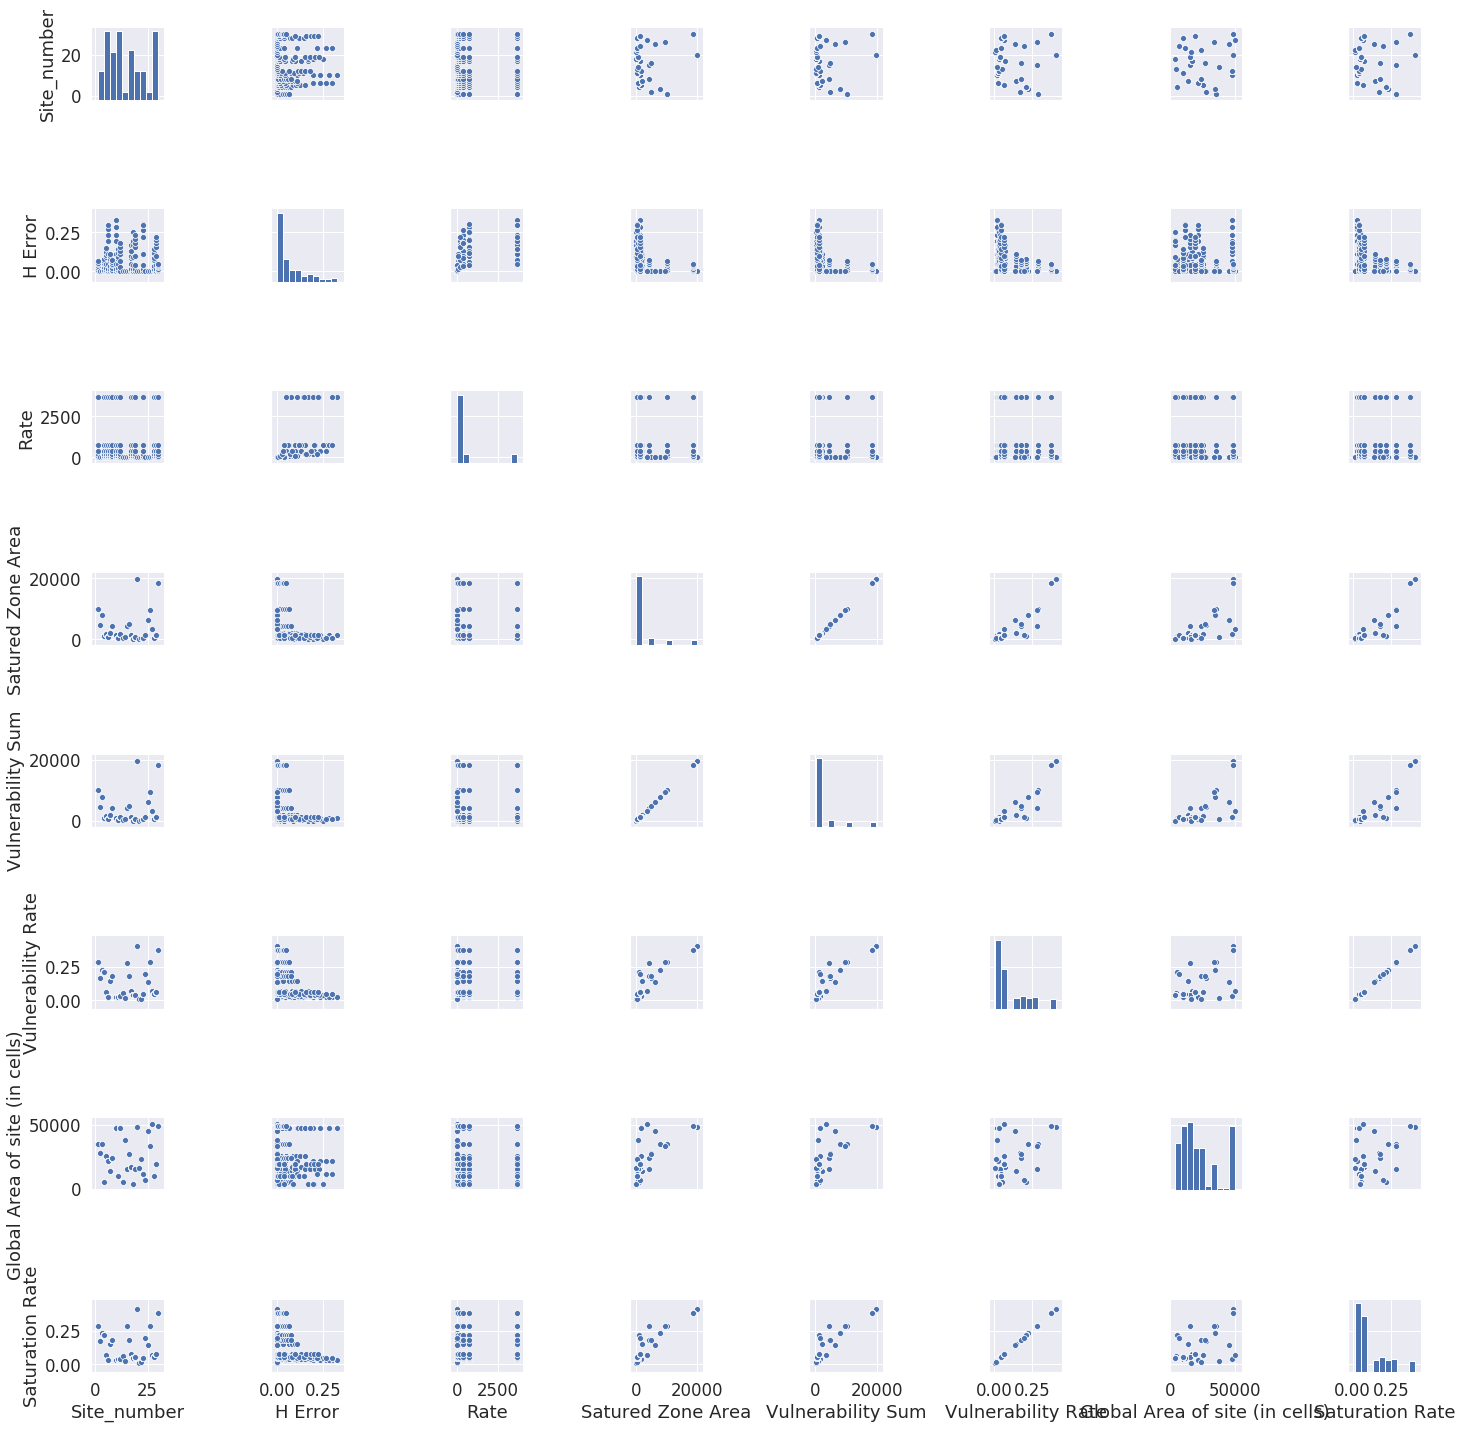

<Figure size 432x288 with 0 Axes>

In [17]:
# Lib imports
import seaborn as sns

sns.pairplot(df_Chr_Approx, height=2.5)
#plt.savefig(MYDIR + '/Pairplots_HError' + '.png')
plt.show()
plt.clf()

## Correlation matrixes

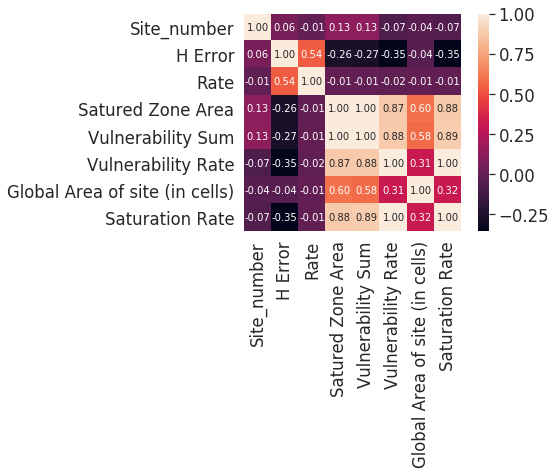

<Figure size 432x288 with 0 Axes>

In [18]:
# lib imports
import seaborn as sns
import numpy as np

cm = np.corrcoef(df_Chr_Approx.values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size': 10},
                yticklabels=list(df_Chr_Approx),
                xticklabels=list(df_Chr_Approx))
#plt.savefig(MYDIR + '/CorrelationMatrix_HError'+'.png')
plt.show()
plt.clf()

# Launching the prediction

In [27]:
from IPython.display import Javascript, display
from ipywidgets import widgets


liste_site = x=widgets.Dropdown(
    options=[('Breville-Sur-Mer', 1), ('Jullouville', 4), ('Etréham', 5), ('Genêts', 6), ('Saint-Pair-sur-Mer', 7), ('Arromanches-les-Bains', 8), ('Courtils', 10), ('Lessay', 11), ('Doville', 12), ('Lestre', 17), ('Banville', 18), ('Isigny-sur-Mer', 19)],
    value=17,
    description='Site to predict:',
)

def on_value_change(change):
    #print(change['new'])
    global test_site 
    test_site = change['new']
    #print(test_site)



liste_site.observe(on_value_change, names='value')
display(liste_site)

    
def run_all(ev):
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, IPython.notebook.ncells())'))

button = widgets.Button(description="Predict")
button.on_click(run_all)
display(button)

Dropdown(description='Site to predict:', index=9, options=(('Breville-Sur-Mer', 1), ('Jullouville', 4), ('Etré…

Button(description='Predict', style=ButtonStyle())

## Building the prediction model with the learning data

### Spliting training data and tetsing data for the dataset used for to build the prediction algorithm

In [26]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=learn_size, random_state=1)
#print("Training and testing split was successful.")

# Splitting the y (H indicator) into training and testing data
# Extracting the data corresponding to the site we want to predict
y_test = y[y.Site_number == int(test_site)]
## We do not want to take the site number into account for the prediction
del y_test["Site_number"] 

# Removing the data for the site we want to predict
y_train = y.drop(y[y.Site_number == int(test_site)].index)
## We do not want to take the site number into account for the prediction
del y_train["Site_number"]

# Splitting the x (features) into training and testing data
X_test = X[X.Site_number == int(test_site)]
## We do not want to take the site number into account for the prediction
del X_test["Site_number"] 

# Removing the data for the site we want to predict
X_train = X.drop(X[X.Site_number == int(test_site)].index)
## We do not want to take the site number into account for the prediction
del X_train["Site_number"]

### Using a random Forest algo to build the prediction model

In [41]:
#import libs
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# n_estimators :
# creiterion :
# random_state :
# n_jobs :
forest = RandomForestRegressor(n_estimators=1000, criterion='mse', random_state=1, n_jobs=-1)
forest.fit(X_train, y_train)

# Predicting results
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print(y_test_pred, y_test)





<ipython-input-41-e911e0b212dc>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)


[0.         0.00091479 0.00394674 0.0119068  0.03142645 0.04657133
 0.05279583 0.06209136 0.07548022]       H Error
128  0.000000
129  0.000790
130  0.004061
131  0.011274
132  0.029907
133  0.066772
134  0.080720
135  0.098253
136  0.107657
0 9
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
730 3652


### Getting the prediction quality results

In [25]:
mse_train=mean_squared_error(y_train, y_train_pred)
mse_test=mean_squared_error(y_test, y_test_pred)
r2_train=r2_score(y_train, y_train_pred)
r2_test=r2_score(y_test, y_test_pred)
print('MSE train: %.3f, test: %.3f' % (mse_train, mse_test))
print('R^2 train: %.3f, test: %.3f' % (r2_train,r2_test))

MSE train: 0.000, test: 0.000
R^2 train: 0.995, test: 0.772
